In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 8.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=7ce34714abba17548637339ff25a6502dccbc207e2100ea128d922819765470f
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf

In [ ]:
import pandas as pd


In [ ]:
df = yf.download('EURUSD=X', start='2020-02-05', end='2021-02-06', interval='1h')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-05,1.104728,1.105217,1.104484,1.104972,1.104972,0
2020-02-05,1.104606,1.104850,1.104240,1.104362,1.104362,0
2020-02-05,1.104362,1.104484,1.103753,1.103753,1.103753,0
2020-02-05,1.103753,1.104240,1.103631,1.103753,1.103753,0
2020-02-05,1.103753,1.104118,1.103631,1.103875,1.103875,0
...,...,...,...,...,...,...
2021-02-05,1.198610,1.199904,1.198179,1.199185,1.199185,0
2021-02-05,1.199185,1.202357,1.198610,1.200913,1.200913,0
2021-02-05,1.200769,1.202790,1.200624,1.202790,1.202790,0


In [ ]:
df['MA200'] = df['Adj Close'].rolling(window=200).mean()

In [ ]:
df = df.dropna()

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200
Date,,,,,,,
2020-02-17,1.084363,1.084952,1.084128,1.084834,1.084834,0,1.092695
2020-02-17,1.084834,1.085541,1.084599,1.084716,1.084716,0,1.092593
2020-02-17,1.084716,1.085305,1.084599,1.084952,1.084952,0,1.092496
2020-02-17,1.084952,1.085069,1.083893,1.084246,1.084246,0,1.092399
2020-02-17,1.084128,1.084834,1.083893,1.084481,1.084481,0,1.092302
...,...,...,...,...,...,...,...
2021-02-05,1.198610,1.199904,1.198179,1.199185,1.199185,0,1.207934
2021-02-05,1.199185,1.202357,1.198610,1.200913,1.200913,0,1.207872
2021-02-05,1.200769,1.202790,1.200624,1.202790,1.202790,0,1.207818


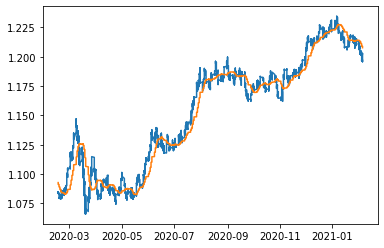

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Adj Close'])
plt.plot(df['MA200'])
plt.show()

In [ ]:
df['price change'] = df['Adj Close'].pct_change()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df = df.dropna()

In [ ]:
df['Upmove'] = df['price change'].apply(lambda x: x if x>0 else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x<0 else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['avg Up'] = df['Upmove'].ewm(span=19).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['avg Down']= df['Downmove'].ewm(span=19).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df = df.dropna()

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,avg Up,avg Down
Date,,,,,,,,,,,,
2020-02-17,1.084834,1.085541,1.084599,1.084716,1.084716,0,1.092593,-0.000108,0.000000,0.000108,0.000000,0.000108
2020-02-17,1.084716,1.085305,1.084599,1.084952,1.084952,0,1.092496,0.000217,0.000217,0.000000,0.000114,0.000051
2020-02-17,1.084952,1.085069,1.083893,1.084246,1.084246,0,1.092399,-0.000651,0.000000,0.000651,0.000072,0.000272
2020-02-17,1.084128,1.084834,1.083893,1.084481,1.084481,0,1.092302,0.000217,0.000217,0.000000,0.000114,0.000193
2020-02-17,1.084011,1.084716,1.083541,1.084011,1.084011,0,1.092203,-0.000434,0.000000,0.000434,0.000086,0.000252
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05,1.198610,1.199904,1.198179,1.199185,1.199185,0,1.207934,0.000600,0.000600,0.000000,0.000290,0.000171
2021-02-05,1.199185,1.202357,1.198610,1.200913,1.200913,0,1.207872,0.001441,0.001441,0.000000,0.000405,0.000154
2021-02-05,1.200769,1.202790,1.200624,1.202790,1.202790,0,1.207818,0.001564,0.001564,0.000000,0.000521,0.000138


In [ ]:
df['RS'] = df['avg Up']/df['avg Down']

In [ ]:
df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,avg Up,avg Down,RS,RSI
Date,,,,,,,,,,,,,,
2020-02-17,1.084834,1.085541,1.084599,1.084716,1.084716,0,1.092593,-0.000108,0.000000,0.000108,0.000000,0.000108,0.000000,0.000000
2020-02-17,1.084716,1.085305,1.084599,1.084952,1.084952,0,1.092496,0.000217,0.000217,0.000000,0.000114,0.000051,2.223589,68.978677
2020-02-17,1.084952,1.085069,1.083893,1.084246,1.084246,0,1.092399,-0.000651,0.000000,0.000651,0.000072,0.000272,0.264544,20.920137
2020-02-17,1.084128,1.084834,1.083893,1.084481,1.084481,0,1.092302,0.000217,0.000217,0.000000,0.000114,0.000193,0.590953,37.144603
2020-02-17,1.084011,1.084716,1.083541,1.084011,1.084011,0,1.092203,-0.000434,0.000000,0.000434,0.000086,0.000252,0.342579,25.516501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05,1.198610,1.199904,1.198179,1.199185,1.199185,0,1.207934,0.000600,0.000600,0.000000,0.000290,0.000171,1.701402,62.982192
2021-02-05,1.199185,1.202357,1.198610,1.200913,1.200913,0,1.207872,0.001441,0.001441,0.000000,0.000405,0.000154,2.639918,72.526857
2021-02-05,1.200769,1.202790,1.200624,1.202790,1.202790,0,1.207818,0.001564,0.001564,0.000000,0.000521,0.000138,3.771358,79.041605


In [ ]:
df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] <30), 'Buy'] = 'Yes'

In [ ]:
df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] >30), 'Buy'] = 'No'

In [ ]:
df.loc[(df['Adj Close'] < df['MA200']) & (df['RSI'] >70), 'Sell'] = 'Yes'

In [ ]:
df.loc[(df['Adj Close'] > df['MA200']) | (df['RSI'] <70), 'Sell'] = 'No'

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,avg Up,avg Down,RS,RSI,Buy,Sell
Date,,,,,,,,,,,,,,,,
2020-02-17,1.084834,1.085541,1.084599,1.084716,1.084716,0,1.092593,-0.000108,0.000000,0.000108,0.000000,0.000108,0.000000,0.000000,No,No
2020-02-17,1.084716,1.085305,1.084599,1.084952,1.084952,0,1.092496,0.000217,0.000217,0.000000,0.000114,0.000051,2.223589,68.978677,No,No
2020-02-17,1.084952,1.085069,1.083893,1.084246,1.084246,0,1.092399,-0.000651,0.000000,0.000651,0.000072,0.000272,0.264544,20.920137,No,No
2020-02-17,1.084128,1.084834,1.083893,1.084481,1.084481,0,1.092302,0.000217,0.000217,0.000000,0.000114,0.000193,0.590953,37.144603,No,No
2020-02-17,1.084011,1.084716,1.083541,1.084011,1.084011,0,1.092203,-0.000434,0.000000,0.000434,0.000086,0.000252,0.342579,25.516501,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05,1.198610,1.199904,1.198179,1.199185,1.199185,0,1.207934,0.000600,0.000600,0.000000,0.000290,0.000171,1.701402,62.982192,No,No
2021-02-05,1.199185,1.202357,1.198610,1.200913,1.200913,0,1.207872,0.001441,0.001441,0.000000,0.000405,0.000154,2.639918,72.526857,No,Yes
2021-02-05,1.200769,1.202790,1.200624,1.202790,1.202790,0,1.207818,0.001564,0.001564,0.000000,0.000521,0.000138,3.771358,79.041605,No,Yes


In [ ]:
PnL = []

for i in range(len(df) - 12):
    if "Yes" in df['Buy'].iloc[i]:
        for j in range(1,11):
            if df['RSI'].iloc[i + j] > 40:
                PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])
                break
            elif j == 10:
                PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])


In [ ]:
SPnL = []


for i in range(len(df) - 12):
    if "Yes" in df['Sell'].iloc[i]:
        for j in range(1,11):
            if df['RSI'].iloc[i + j] < 60:
                PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])
                break
            elif j == 10:
                PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])


In [ ]:
PnL

In [ ]:
SPnL

In [ ]:
len([i for i in PnL if i > 0])

79

In [ ]:
len(PnL)

115

In [ ]:
79/115

0.6869565217391305

In [ ]:
df.loc[df['Buy'] == 'Yes']

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,avg Up,avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2020-03-31,1.099989,1.100473,1.098418,1.098418,1.098418,0,1.088125,-0.001318,0.000000,0.001318,0.000247,0.000669,0.368452,26.924725,Yes
2020-03-31,1.098418,1.099143,1.097093,1.098177,1.098177,0,1.088149,-0.000220,0.000000,0.000220,0.000222,0.000624,0.355490,26.225928,Yes
2020-03-31,1.097574,1.098298,1.095290,1.095290,1.095290,0,1.088145,-0.002629,0.000000,0.002629,0.000200,0.000825,0.242196,19.497383,Yes
2020-03-31,1.094571,1.096011,1.093255,1.095530,1.095530,0,1.088167,0.000219,0.000219,0.000000,0.000202,0.000742,0.271709,21.365674,Yes
2020-04-01,1.095770,1.096131,1.092061,1.093853,1.093853,0,1.090540,-0.001969,0.000000,0.001969,0.000376,0.000994,0.378577,27.461455,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,1.227295,1.227446,1.222942,1.224140,1.224140,0,1.222705,-0.002571,0.000000,0.002571,0.000201,0.000586,0.343443,25.564410,Yes
2020-12-31,1.224290,1.224440,1.222643,1.223391,1.223391,0,1.222710,-0.000612,0.000000,0.000612,0.000181,0.000589,0.307776,23.534298,Yes
2020-12-31,1.223391,1.223990,1.222643,1.223092,1.223092,0,1.222720,-0.000245,0.000000,0.000245,0.000163,0.000555,0.294196,22.731951,Yes
